# Neural Networks: Hand Sign Detection
### Welcome to homework 2  &#128522;&#9996;

We will start by loading the packages:

In [1]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

%matplotlib inline

Then, Unzip the data:

In [2]:
with zipfile.ZipFile('./data.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

and Normalize the data before feeding to model:

In [3]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

After, we load the dataset:

In [4]:
train_generator = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    './data/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


The input data are from different 24 classes excluding J and Z:

In [5]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

Now, take a look at some examples of images in the dataset. Feel free to change the value of array range and re-run to see different examples.

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

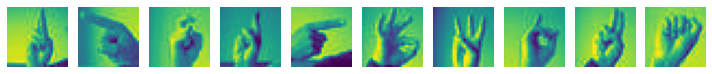

[16. 14. 22. 16.  6.  5. 21.  3. 19.  0.]


In [7]:
sample_training_images, sample_training_labels = next(train_generator)
plotImages(sample_training_images[:10])
print(sample_training_labels[:10])

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

In [8]:
train = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 21974,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

test = test_datagen.flow_from_directory(
    './data/Test',
    target_size = (28, 28),
    batch_size = 7172,
    class_mode = "sparse",
    color_mode='grayscale'
    )
validation = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 5481,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

Found 21974 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


در قسمت زیر با استفاده از تابع نتکست کلیه ی ورودی ها و خروجی ها مشخص شده و در ماتریس های مربوطه قرار داده شده 

In [9]:
X_validation, y_validation = next(validation)

X_train, y_train = next(train)

X_test, y_test = next(test)

در زیر مقادیر اولیه به متغیرهایی که در ادامه استفاده میشود تخصیص داده شده 

In [10]:
image_size = 28
num_channels = 1
num_features = image_size * image_size * num_channels
num_classes = 24

num_train = 21974

In [ ]:
در زیر داده ها ریشیپ شده و به دوبعد تغییر پیدا کرده 

In [11]:

X_train = X_train.reshape([-1, num_features])
X_test  = X_test.reshape([-1, num_features])
X_validation  = X_validation.reshape([-1, num_features])


print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))
print('validation  data shape: {}'.format(X_validation.shape))

Train data shape: (21974, 784)
Test  data shape: (7172, 784)
validation  data shape: (5481, 784)


In [ ]:
در  قسمت زیر خروجی ها به صوورت وان هات وکتور در امده 

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)
y_validation = keras.utils.to_categorical(y_validation,  num_classes)

print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(21974, 24)
(7172, 24)
(5481, 24)


In [13]:
در زیر یک مدل ساده بدون استفاده از نرمال سازی و dropout 
تعریف شده 

In [13]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden Layer
model.add(Dense(units=100))
model.add(Activation(activation='relu'))

model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))


# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                2

In [ ]:
در قسمت زیر از تابع بیهنه سازRMSprop
استفاده شده و مدل با ایت تابع اموزش داده شده 

In [15]:
optimizer = keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
در قسمت زیر فرایند اموزش انجام شده و بچ سایز و تعداد اییپاک مشخص شده 

In [16]:
history =model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_validation[:], y_validation[:]))

Epoch 1/15
86/86 [==============================] - 1s 10ms/step - loss: 2.9548 - accuracy: 0.1266 - val_loss: 2.7186 - val_accuracy: 0.2186
Epoch 2/15
86/86 [==============================] - 1s 6ms/step - loss: 2.4471 - accuracy: 0.2557 - val_loss: 2.0977 - val_accuracy: 0.3242
Epoch 3/15
86/86 [==============================] - 1s 6ms/step - loss: 2.1048 - accuracy: 0.3434 - val_loss: 2.0637 - val_accuracy: 0.3155
Epoch 4/15
86/86 [==============================] - 1s 6ms/step - loss: 1.8739 - accuracy: 0.4078 - val_loss: 1.6754 - val_accuracy: 0.4421
Epoch 5/15
86/86 [==============================] - 1s 6ms/step - loss: 1.6855 - accuracy: 0.4569 - val_loss: 1.8880 - val_accuracy: 0.3870
Epoch 6/15
86/86 [==============================] - 1s 6ms/step - loss: 1.5352 - accuracy: 0.5049 - val_loss: 1.4796 - val_accuracy: 0.4839
Epoch 7/15
86/86 [==============================] - 1s 6ms/step - loss: 1.3965 - accuracy: 0.5471 - val_loss: 1.6815 - val_accuracy: 0.4809
Epoch 8/15
86/86 [=

In [ ]:
نمودار مربوط به لاس برای داده های اموزش و ارزیابی رسم شده 

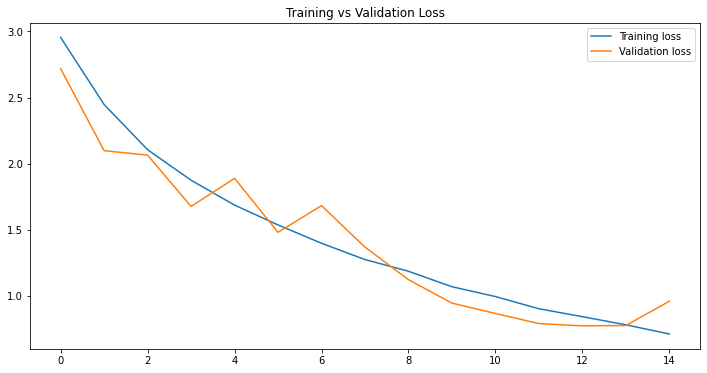

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
در زیر نمودار دقت برای داده های اموزش و ارزیابی رسم شده 

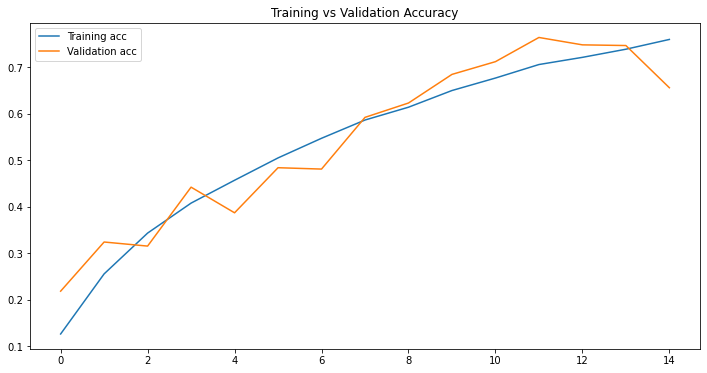

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [ ]:
در مدل زیر ازBatchNormalization, Dropout
استفاده شده تا دقت بهبود پیدا کند و خروجی بهتری داشته باشیم

In [19]:
from keras.layers import BatchNormalization, Dropout

In [20]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization()) 
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_4 (Activation)    (None, 100)              

In [ ]:
در زیر از بهینه ساز Adam
استفاده شده و تابع هزینه ی کراس انتروپی  نرخ یادگیری و میزان کاهش ان با امتحان کردن بدست امده و در حالت جواب بهتری داشته 

In [21]:
optimizer = keras.optimizers.Adam(lr=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
در زیر مدل با بچ سایز 256 و تعداد ایپاک 10 اموزش داده شده 

In [28]:
history =model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=10,
          validation_data=(X_validation[:], y_validation[:]))

Epoch 1/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0456 - accuracy: 0.9870 - val_loss: 3.2888 - val_accuracy: 0.5984
Epoch 2/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 1.2380 - val_accuracy: 0.7659
Epoch 3/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 3.7555 - val_accuracy: 0.5846
Epoch 4/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0409 - accuracy: 0.9865 - val_loss: 8.6356 - val_accuracy: 0.4096
Epoch 5/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0365 - accuracy: 0.9874 - val_loss: 0.9080 - val_accuracy: 0.8033
Epoch 6/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 5.6179 - val_accuracy: 0.4694
Epoch 7/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 4.6465 - val_accuracy: 0.5488
Epoch 8/10
86/86 [==

In [ ]:
در زیر نمودار های مربوط به لاس و دقت رسم شده 

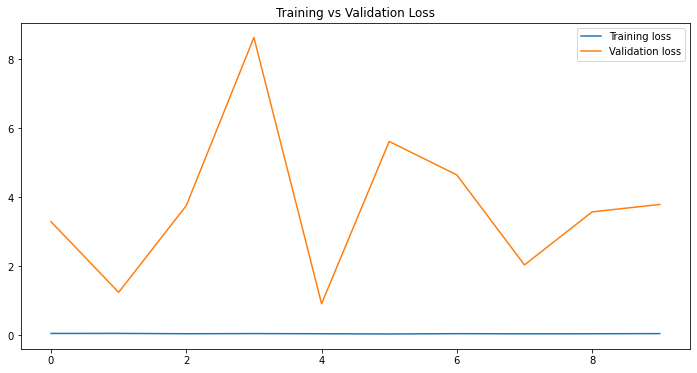

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

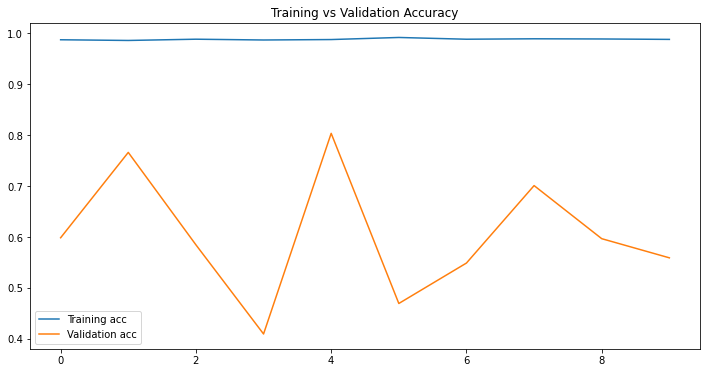

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [ ]:
در مدل زیر یک لایه ی مخفی دیگر اضفه شده و جددا مدل ترین شده 

In [31]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization()) 
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=100))
model.add(BatchNormalization()) 
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
activation_6 (Activation)    (None, 100)              

In [32]:
optimizer = keras.optimizers.Adam(lr=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history =model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=20,
          validation_data=(X_validation[:], y_validation[:]))

Epoch 1/20
86/86 [==============================] - 1s 11ms/step - loss: 0.0575 - accuracy: 0.9813 - val_loss: 1.6218 - val_accuracy: 0.7052
Epoch 2/20
86/86 [==============================] - 1s 10ms/step - loss: 0.0548 - accuracy: 0.9836 - val_loss: 1.4446 - val_accuracy: 0.6988
Epoch 3/20
86/86 [==============================] - 1s 10ms/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.6494 - val_accuracy: 0.8252
Epoch 4/20
86/86 [==============================] - 1s 10ms/step - loss: 0.0545 - accuracy: 0.9846 - val_loss: 3.0005 - val_accuracy: 0.5760
Epoch 5/20
86/86 [==============================] - 1s 10ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 1.7706 - val_accuracy: 0.6439
Epoch 6/20
86/86 [==============================] - 1s 10ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 2.7816 - val_accuracy: 0.5444
Epoch 7/20
86/86 [==============================] - 1s 10ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 1.7369 - val_accuracy: 0.6493
Epoch 8/20
86

 در زیر داده های تست به مدل داده شده اند و دقت بدست امده مشخص شده 

In [40]:

idx = np.random.choice(X_test.shape[0], 7172, replace=False)
y_pred =np.argmax(model.predict(X_test[idx]), axis=-1) 
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy = %.2f' % (100.0 * np.mean(y_pred == y_true)))
print(y_pred)
print(y_true)

Test Accuracy = 43.56
[ 7 17  5 ... 22 16  0]
[ 7 11  5 ... 22  9  0]
